In [1]:
import pandas as pd

In [2]:
cr=pd.read_csv(r"C:\Users\Vaibhav A. Ghorpade\Desktop\dataset\loan-train.csv")

In [3]:
cr.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
cr.shape

(614, 13)

In [5]:
#problem Statement
#1. Bank want to build predictive model which it can be use for loan approval and loan rejection

In [6]:
cr.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
#Data Cleaning
cr.Gender=cr.Gender.fillna("Male")               
cr.Married=cr.Married.fillna("No")              
cr.Dependents=cr.Dependents.fillna(0)          
cr.Self_Employed=cr.Self_Employed.fillna("Yes")       
cr.LoanAmount=cr.LoanAmount.fillna(cr.LoanAmount.mean())           
cr.Loan_Amount_Term=cr.Loan_Amount_Term.fillna(cr.Loan_Amount_Term.mean())     
cr.Credit_History=cr.Credit_History.fillna(0.0)       

In [8]:
cr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [9]:
#Checking dependnt variable has how much unique values
cr.Dependents.unique()

array(['0', '1', '2', '3+', 0], dtype=object)

In [10]:
#as depandant variable contains mix of string and int we need to replace all value with string or int
cr.Dependents=cr.Dependents.replace({"0":"zero","1":"one","2":"two","3+":"Three And Above",0:"zero"})

In [11]:
cr.Dependents.unique()

array(['zero', 'one', 'two', 'Three And Above'], dtype=object)

In [12]:
#label Encoder
#There should not be any null in dataframe for label encoder 

In [13]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [14]:
cr.Gender=le.fit_transform(cr.Gender)               
cr.Married=le.fit_transform(cr.Married)                      
cr.Self_Employed=le.fit_transform(cr.Self_Employed)                 
cr.Property_Area=le.fit_transform(cr.Property_Area)
cr.Education=le.fit_transform(cr.Education)
cr.Dependents=le.fit_transform(cr.Dependents)

In [15]:
#converting target variable into binary numeric
cr.Loan_Status=cr.Loan_Status.replace({"Y":1,"N":0})

In [16]:
cr=cr.drop(["Loan_ID"],axis=1)

In [17]:
cr.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,3,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,1,1,3,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,1,1,3,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,1,0,3,0,0,6000,0.0,141.000000,360.0,1.0,2,1


In [18]:
cr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    int32  
 1   Married            614 non-null    int32  
 2   Dependents         614 non-null    int32  
 3   Education          614 non-null    int32  
 4   Self_Employed      614 non-null    int32  
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    int32  
 11  Loan_Status        614 non-null    int64  
dtypes: float64(4), int32(6), int64(2)
memory usage: 43.3 KB


In [19]:
cr.Dependents.unique()

array([3, 1, 2, 0])

In [20]:
#splitting the model into train and test data

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
cr_train,cr_test=train_test_split(cr,test_size=0.2)

In [23]:
cr_train_x=cr_train.iloc[: ,0:-1]
cr_test_x=cr_test.iloc[: ,0:-1]

In [24]:
cr_train_y=cr_train.iloc[: ,-1]
cr_test_y=cr_test.iloc[: ,-1]

In [25]:
from sklearn.linear_model import LogisticRegression

In [26]:
log_cr=LogisticRegression()

In [27]:
log_cr.fit(cr_train_x,cr_train_y)

C:\Users\Vaibhav A. Ghorpade\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [28]:
pred=log_cr.predict(cr_test_x)

In [29]:
pred

array([1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1], dtype=int64)

In [30]:
len(pred)

123

In [31]:
#confusion matrix
#two ways for confusion matrix
#1. using crosstab
#2. using sklearn

In [32]:
tab_cr=pd.crosstab(cr_test_y,pred)
tab_cr

col_0,0,1
Loan_Status,,
0,18,22
1,12,71


In [33]:
from sklearn.metrics import confusion_matrix
tab_cr=confusion_matrix(cr_test_y,pred)
tab_cr

array([[18, 22],
       [12, 71]], dtype=int64)

In [34]:
accu=tab_cr.diagonal().sum()*100/tab_cr.sum()
accu

72.35772357723577

In [41]:
#another method to get accuracy
from sklearn.metrics import accuracy_score
accuracy_score(cr_test_y,pred)*100

72.35772357723577

In [38]:
Tpr=(tab_cr[1][1]*100)/(tab_cr[1][1]+tab_cr[1][0])
Tpr

85.5421686746988

In [45]:
#another method to get Tpr Or recall
from sklearn.metrics import recall_score
recall_score(cr_test_y,pred)*100

85.54216867469879

In [39]:
Fpr=(tab_cr[0][1]*100)/(tab_cr[0][1]+tab_cr[0][0])
Fpr

55.0

In [42]:
#Two ways of checking precision
from sklearn.metrics import precision_score
precision_score(cr_test_y,pred)*100

76.34408602150538

In [44]:
precision=(tab_cr[1][1]*100)/(tab_cr[1][1]+tab_cr[0][1])
precision

76.34408602150538

In [46]:
#F1 ratio
from sklearn.metrics import f1_score
f1_score(cr_test_y,pred)*100

80.68181818181817

In [47]:
#auroc and build the plot for auroc

In [48]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [49]:
pred=log_cr.predict(cr_test_x)
#pred

In [50]:
pred_prob=log_cr.predict_proba(cr_test_x)

In [52]:
pred_prob

array([[0.32654058, 0.67345942],
       [0.51091219, 0.48908781],
       [0.82883137, 0.17116863],
       [0.15656761, 0.84343239],
       [0.10890213, 0.89109787],
       [0.66591032, 0.33408968],
       [0.34603329, 0.65396671],
       [0.14217203, 0.85782797],
       [0.11719886, 0.88280114],
       [0.13765332, 0.86234668],
       [0.18606202, 0.81393798],
       [0.37028862, 0.62971138],
       [0.14995752, 0.85004248],
       [0.30248589, 0.69751411],
       [0.62925203, 0.37074797],
       [0.14457863, 0.85542137],
       [0.24490033, 0.75509967],
       [0.15713599, 0.84286401],
       [0.35974888, 0.64025112],
       [0.20582462, 0.79417538],
       [0.62455928, 0.37544072],
       [0.10357809, 0.89642191],
       [0.58931848, 0.41068152],
       [0.31495219, 0.68504781],
       [0.22767621, 0.77232379],
       [0.19811898, 0.80188102],
       [0.69212041, 0.30787959],
       [0.14713993, 0.85286007],
       [0.17105782, 0.82894218],
       [0.27563022, 0.72436978],
       [0.

In [53]:
pred_prob.shape

(123, 2)

In [55]:
roc_auc_score(cr_test_y,pred)
#this is the area under the curve AUROC

0.6527108433734939

In [56]:
pred_prob=log_cr.predict_proba(cr_test_x)
pred_prob.shape

(123, 2)

In [57]:
pred_prob

array([[0.32654058, 0.67345942],
       [0.51091219, 0.48908781],
       [0.82883137, 0.17116863],
       [0.15656761, 0.84343239],
       [0.10890213, 0.89109787],
       [0.66591032, 0.33408968],
       [0.34603329, 0.65396671],
       [0.14217203, 0.85782797],
       [0.11719886, 0.88280114],
       [0.13765332, 0.86234668],
       [0.18606202, 0.81393798],
       [0.37028862, 0.62971138],
       [0.14995752, 0.85004248],
       [0.30248589, 0.69751411],
       [0.62925203, 0.37074797],
       [0.14457863, 0.85542137],
       [0.24490033, 0.75509967],
       [0.15713599, 0.84286401],
       [0.35974888, 0.64025112],
       [0.20582462, 0.79417538],
       [0.62455928, 0.37544072],
       [0.10357809, 0.89642191],
       [0.58931848, 0.41068152],
       [0.31495219, 0.68504781],
       [0.22767621, 0.77232379],
       [0.19811898, 0.80188102],
       [0.69212041, 0.30787959],
       [0.14713993, 0.85286007],
       [0.17105782, 0.82894218],
       [0.27563022, 0.72436978],
       [0.

In [58]:
#pred_prob[:,1]  #it will select probabilty for class 1

array([0.67345942, 0.48908781, 0.17116863, 0.84343239, 0.89109787,
       0.33408968, 0.65396671, 0.85782797, 0.88280114, 0.86234668,
       0.81393798, 0.62971138, 0.85004248, 0.69751411, 0.37074797,
       0.85542137, 0.75509967, 0.84286401, 0.64025112, 0.79417538,
       0.37544072, 0.89642191, 0.41068152, 0.68504781, 0.77232379,
       0.80188102, 0.30787959, 0.85286007, 0.82894218, 0.72436978,
       0.81011185, 0.69284505, 0.33974808, 0.72877778, 0.25372171,
       0.89233071, 0.84657328, 0.81053383, 0.83684098, 0.86065989,
       0.81879202, 0.46008987, 0.77418244, 0.78377254, 0.90431984,
       0.36399582, 0.7690837 , 0.42753255, 0.83723472, 0.81498305,
       0.86308776, 0.88938883, 0.88071784, 0.83239216, 0.42464402,
       0.8663846 , 0.66935997, 0.45811567, 0.40224768, 0.30013649,
       0.8204316 , 0.78434649, 0.33666845, 0.29291552, 0.82501577,
       0.85841732, 0.77432209, 0.60986262, 0.81264496, 0.42284471,
       0.7905413 , 0.81049026, 0.84220158, 0.86990884, 0.89108

In [59]:
#Roc Curve
fpr,tpr,thresh=roc_curve(cr_test_y,pred_prob[:,1])

Text(0.5, 0.5, 'AUROC is 0.6527108433734939')

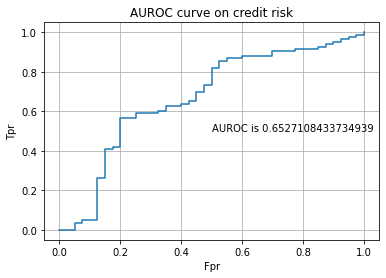

In [63]:
import matplotlib.pyplot as plt
plt.plot(fpr,tpr)
plt.xlabel("Fpr")
plt.ylabel("Tpr")
plt.title("AUROC curve on credit risk")
plt.grid()
plt.text(x=0.5,y=.5,s="AUROC is 0.6527108433734939")